In [100]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [101]:
df=pd.read_csv('Clean_Dataset_final.csv.zip')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555082 entries, 0 to 555081
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   video_id       555082 non-null  object
 1   index          555082 non-null  int64 
 2   publishedAt    555082 non-null  object
 3   categoryId     555082 non-null  int64 
 4   trending_date  555082 non-null  object
 5   view_count     555082 non-null  int64 
 6   likes          555082 non-null  int64 
 7   dislikes       555082 non-null  int64 
 8   comment_count  555082 non-null  int64 
 9   Country        555082 non-null  object
 10  trend_year     555082 non-null  int64 
 11  category       555082 non-null  object
 12  des            554166 non-null  object
 13  c_tags         455303 non-null  object
 14  c_title        551361 non-null  object
 15  channel_title  554160 non-null  object
dtypes: int64(7), object(9)
memory usage: 67.8+ MB


In [103]:
ML_df= df.groupby(['Country','video_id','trending_date','publishedAt','category'],as_index=False).agg({'view_count':\
                                                   'max','likes':'max','dislikes':'max','comment_count':'max'})

In [104]:
ML_df[ML_df.video_id=='9Lhbm87KmOc']

,Country,video_id,trending_date,publishedAt,category,view_count,likes,dislikes,comment_count
29597,Canada,9Lhbm87KmOc,2021-11-05,2021-11-04 15:00:08,Entertainment,1499810,76792,540,8114
29598,Canada,9Lhbm87KmOc,2021-11-06,2021-11-04 15:00:08,Entertainment,2123516,96213,708,9845
29599,Canada,9Lhbm87KmOc,2021-11-07,2021-11-04 15:00:08,Entertainment,2368472,104490,797,10495
29600,Canada,9Lhbm87KmOc,2021-11-08,2021-11-04 15:00:08,Entertainment,2564579,111414,867,10945
29601,Canada,9Lhbm87KmOc,2021-11-09,2021-11-04 15:00:08,Entertainment,2718668,116626,913,11368
29602,Canada,9Lhbm87KmOc,2021-11-10,2021-11-04 15:00:08,Entertainment,2831812,120078,946,11617
389536,USA,9Lhbm87KmOc,2021-11-05,2021-11-04 15:00:08,Entertainment,1499810,76790,540,8114
389537,USA,9Lhbm87KmOc,2021-11-06,2021-11-04 15:00:08,Entertainment,2123516,96213,708,9845
389538,USA,9Lhbm87KmOc,2021-11-07,2021-11-04 15:00:08,Entertainment,2368472,104490,797,10495
389539,USA,9Lhbm87KmOc,2021-11-08,2021-11-04 15:00:08,Entertainment,2564579,111414,867,10945


In [105]:
df1 = ML_df.copy()

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543815 entries, 0 to 543814
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Country        543815 non-null  object
 1   video_id       543815 non-null  object
 2   trending_date  543815 non-null  object
 3   publishedAt    543815 non-null  object
 4   category       543815 non-null  object
 5   view_count     543815 non-null  int64 
 6   likes          543815 non-null  int64 
 7   dislikes       543815 non-null  int64 
 8   comment_count  543815 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 37.3+ MB


In [107]:
df1['trending_date'] = pd.to_datetime(df1['trending_date'])
df1['publishedAt'] = pd.to_datetime(df1['publishedAt'])

In [108]:
df1['trending_day_no'] = df1.groupby(['Country','video_id'])["trending_date"].rank('first',ascending=True)

In [109]:
df1_count = df1.groupby(['Country','video_id'],as_index=False)["trending_date"].count().rename(columns={\
                                                                'trending_date':'total_trending_days'})

In [110]:
df2 = df1.merge(df1_count, left_on=['Country','video_id'], right_on=['Country','video_id'])
df2.head()

,Country,video_id,trending_date,publishedAt,category,view_count,likes,dislikes,comment_count,trending_day_no,total_trending_days
0,Canada,--14w5SOEUs,2021-06-11,2021-06-10 16:00:00,Music,2146104,167041,1755,12998,1.0,5
1,Canada,--14w5SOEUs,2021-06-12,2021-06-10 16:00:00,Music,3963014,218569,2847,15442,2.0,5
2,Canada,--14w5SOEUs,2021-06-13,2021-06-10 16:00:00,Music,5167987,240113,3414,16241,3.0,5
3,Canada,--14w5SOEUs,2021-06-14,2021-06-10 16:00:00,Music,6078723,252005,3778,16228,4.0,5
4,Canada,--14w5SOEUs,2021-06-15,2021-06-10 16:00:00,Music,6823249,262692,4107,16445,5.0,5


In [113]:
vis=df2.copy()

In [137]:
df2.corr()

,view_count,likes,dislikes,comment_count,trending_day_no,total_trending_days,published_year,published_month,published_day,published_hour,...,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
view_count,1.000000,0.835461,0.145135,0.535939,0.254687,0.287731,-0.029308,0.004013,-0.002212,-0.070189,...,-0.053771,-0.030600,0.139837,-0.027428,-0.000158,-0.017358,-0.007394,0.000669,-0.031576,-0.017660
likes,0.835461,1.000000,0.111411,0.685913,0.174962,0.218286,-0.041043,0.012107,0.005079,-0.059059,...,-0.037169,-0.028323,0.163222,-0.053313,-0.000746,-0.000934,-0.007077,-0.001123,-0.067289,-0.013625
dislikes,0.145135,0.111411,1.000000,0.148434,0.033862,0.041619,-0.042094,0.008231,-0.000842,-0.018569,...,-0.009062,-0.002540,0.019561,-0.002476,-0.000317,-0.002591,-0.001926,0.000267,-0.008246,-0.002590
comment_count,0.535939,0.685913,0.148434,1.000000,0.073546,0.108592,-0.044243,0.009153,-0.000209,-0.043946,...,-0.015397,-0.014326,0.125641,-0.012617,-0.000342,-0.020713,-0.004948,-0.005855,-0.024055,-0.007082
trending_day_no,0.254687,0.174962,0.033862,0.073546,1.000000,0.539394,-0.029971,0.005606,0.009327,0.049602,...,0.011720,-0.007214,0.043556,0.012075,0.019893,-0.030565,0.008246,-0.007398,0.003555,-0.002381
total_trending_days,0.287731,0.218286,0.041619,0.108592,0.539394,1.000000,-0.055565,0.010394,0.017291,0.091958,...,0.021780,-0.013215,0.080440,0.022274,0.036881,-0.056554,0.015288,-0.013763,0.006555,-0.004381
published_year,-0.029308,-0.041043,-0.042094,-0.044243,-0.029971,-0.055565,1.000000,-0.434255,-0.031533,0.005084,...,0.084076,-0.033512,-0.061289,-0.016168,-0.006294,0.037178,-0.008603,-0.037715,-0.001230,0.014962
published_month,0.004013,0.012107,0.008231,0.009153,0.005606,0.010394,-0.434255,1.000000,0.016476,0.004549,...,-0.013335,0.004511,0.017789,-0.015238,-0.000405,-0.008559,0.001791,0.011685,0.000013,0.000884
published_day,-0.002212,0.005079,-0.000842,-0.000209,0.009327,0.017291,-0.031533,0.016476,1.000000,0.003510,...,-0.010902,-0.003440,-0.006111,0.003137,-0.006823,0.000850,-0.003055,-0.005554,0.002926,0.004683
published_hour,-0.070189,-0.059059,-0.018569,-0.043946,0.049602,0.091958,0.005084,0.004549,0.003510,1.000000,...,0.095573,0.013723,-0.135813,-0.016668,-0.006430,-0.023353,0.021500,0.028712,0.008740,0.007157


<AxesSubplot:>

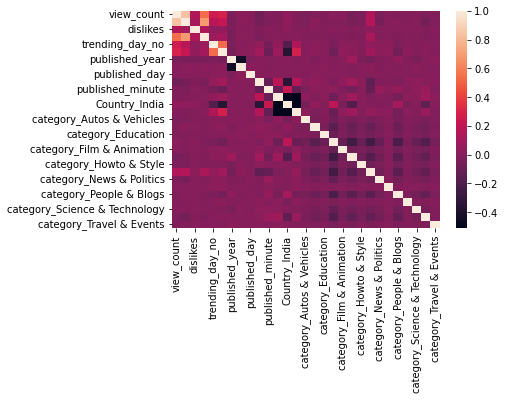

In [136]:
sns.heatmap()

In [115]:
df2[df2['video_id'] == '9Lhbm87KmOc']

,Country,video_id,trending_date,publishedAt,category,view_count,likes,dislikes,comment_count,trending_day_no,total_trending_days
29597,Canada,9Lhbm87KmOc,2021-11-05,2021-11-04 15:00:08,Entertainment,1499810,76792,540,8114,1.0,6
29598,Canada,9Lhbm87KmOc,2021-11-06,2021-11-04 15:00:08,Entertainment,2123516,96213,708,9845,2.0,6
29599,Canada,9Lhbm87KmOc,2021-11-07,2021-11-04 15:00:08,Entertainment,2368472,104490,797,10495,3.0,6
29600,Canada,9Lhbm87KmOc,2021-11-08,2021-11-04 15:00:08,Entertainment,2564579,111414,867,10945,4.0,6
29601,Canada,9Lhbm87KmOc,2021-11-09,2021-11-04 15:00:08,Entertainment,2718668,116626,913,11368,5.0,6
29602,Canada,9Lhbm87KmOc,2021-11-10,2021-11-04 15:00:08,Entertainment,2831812,120078,946,11617,6.0,6
389536,USA,9Lhbm87KmOc,2021-11-05,2021-11-04 15:00:08,Entertainment,1499810,76790,540,8114,1.0,6
389537,USA,9Lhbm87KmOc,2021-11-06,2021-11-04 15:00:08,Entertainment,2123516,96213,708,9845,2.0,6
389538,USA,9Lhbm87KmOc,2021-11-07,2021-11-04 15:00:08,Entertainment,2368472,104490,797,10495,3.0,6
389539,USA,9Lhbm87KmOc,2021-11-08,2021-11-04 15:00:08,Entertainment,2564579,111414,867,10945,4.0,6


In [116]:
df2['published_year'] = df2.publishedAt.dt.year
df2['published_month'] = df2.publishedAt.dt.month
df2['published_day'] = df2.publishedAt.dt.day
df2['published_hour'] = df2.publishedAt.dt.hour
df2['published_minute'] = df2.publishedAt.dt.minute

In [117]:
df2.drop(columns=['video_id', 'trending_date', 'publishedAt'],inplace=True) 

In [118]:
df2.head()

,Country,category,view_count,likes,dislikes,comment_count,trending_day_no,total_trending_days,published_year,published_month,published_day,published_hour,published_minute
0,Canada,Music,2146104,167041,1755,12998,1.0,5,2021,6,10,16,0
1,Canada,Music,3963014,218569,2847,15442,2.0,5,2021,6,10,16,0
2,Canada,Music,5167987,240113,3414,16241,3.0,5,2021,6,10,16,0
3,Canada,Music,6078723,252005,3778,16228,4.0,5,2021,6,10,16,0
4,Canada,Music,6823249,262692,4107,16445,5.0,5,2021,6,10,16,0


In [119]:
df2=pd.get_dummies(df2,prefix=['Country','category'])

In [120]:
df2.head()

,view_count,likes,dislikes,comment_count,trending_day_no,total_trending_days,published_year,published_month,published_day,published_hour,...,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,2146104,167041,1755,12998,1.0,5,2021,6,10,16,...,0,0,1,0,0,0,0,0,0,0
1,3963014,218569,2847,15442,2.0,5,2021,6,10,16,...,0,0,1,0,0,0,0,0,0,0
2,5167987,240113,3414,16241,3.0,5,2021,6,10,16,...,0,0,1,0,0,0,0,0,0,0
3,6078723,252005,3778,16228,4.0,5,2021,6,10,16,...,0,0,1,0,0,0,0,0,0,0
4,6823249,262692,4107,16445,5.0,5,2021,6,10,16,...,0,0,1,0,0,0,0,0,0,0


In [121]:
X = df2.drop('total_trending_days',axis=1)
Y = df2.total_trending_days

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                            test_size=0.2,random_state=27)

In [123]:
dt=DecisionTreeRegressor()

In [124]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [126]:
y_pred_dt=dt.predict(X_test)

In [127]:
y_pred_dt

array([6., 4., 5., ..., 6., 6., 4.])

In [128]:
dataset = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt.feature_importances_}, columns=['Feature', 'Importance'])
dataset.sort_values(by=['Importance'], ascending=False).head(10)

,Feature,Importance
4,trending_day_no,0.344913
11,Country_India,0.099762
7,published_day,0.083968
3,comment_count,0.077477
0,view_count,0.072110
1,likes,0.061729
6,published_month,0.057101
2,dislikes,0.042164
8,published_hour,0.040480
9,published_minute,0.037716


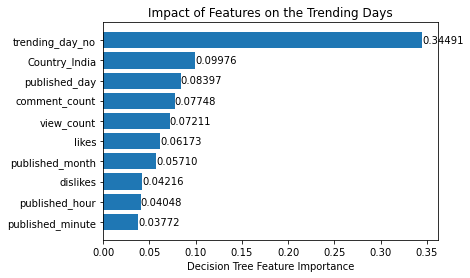

<Figure size 1080x1080 with 0 Axes>

In [134]:
fig,ax=plt.subplots()
sorted_idx = dt.feature_importances_.argsort()
plt.figure(figsize=(15,15))
plot=ax.barh(X_train.columns[sorted_idx[-10:]], dt.feature_importances_[sorted_idx[-10:]])
ax.bar_label(plot,fmt='%.5f')
ax.set_xlabel("Decision Tree Feature Importance")
ax.set_title('Impact of Features on the Trending Days')
plt.show()

In [131]:
vis.groupby(['Country'])['total_trending_days'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,183790.0,5.357495,1.369526,1.0,4.0,5.0,6.0,14.0
India,176116.0,4.113085,1.760171,1.0,3.0,4.0,5.0,11.0
USA,183909.0,5.918476,2.329312,1.0,5.0,6.0,7.0,36.0


In [81]:
Y.mean()

5.144203451541425

In [83]:
Y.value_counts()

5     142015
6     115572
4      99620
7      59269
3      51969
2      25804
8      22920
1      10501
9       8190
10      3530
11      1595
12       840
13       260
16       144
14       140
20       140
27       135
33       132
24       120
23       115
26       104
30        90
18        90
17        85
19        76
15        75
21        63
25        50
22        44
36        36
32        32
31        31
28        28
Name: total_trending_days, dtype: int64

In [87]:
lr=LinearRegression()

In [88]:
lr.fit(X_train,Y_train)

LinearRegression()

In [144]:
y_pred_lr = lr.predict(X_test)

In [145]:
y_pred_lr

array([5.06575107, 5.20830481, 4.68505116, ..., 5.14162103, 4.34303569,
       3.73071856])

In [146]:
import sklearn.metrics

In [147]:
r2_score=sklearn.metrics.r2_score(Y_test, y_pred_lr)

In [151]:
sklearn.metrics.mean_squared_error(Y_test,y_pred_lr)

2.447042523973882

In [148]:
r2_score

0.4052577787928895

In [150]:
sklearn.metrics.r2_score(Y_test,y_pred_dt)

0.5755293561122017

In [152]:
sklearn.metrics.mean_squared_error(Y_test,y_pred_dt)

1.7464670889916607